In [1]:
## Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Load score from score log file

# load scores
score_filepath = "./misc/score.txt"
score_dict = {}
with open(score_filepath, "r") as file:
    for line in file:
        word_list = line.split()
        if len(word_list) == 1:
            model_name = word_list[0]
            score_dict[model_name] = {}
        elif len(word_list) > 1:
            score_name, score_value = word_list[0], float(word_list[1])
            score_dict[model_name][score_name] = score_value

# translate official score names to the names used in the article
name_dict = {
    "weak" : "test/student/weak_f1_macro",
    "intersection" : "test/student/intersection_f1_macro",
    "event" : "test/student/event_f1_macro",
    "psds1" : "test/student/psds1_psds_eval",
    "psds2" : "test/student/psds2_psds_eval",
    "ti-psds1" : "test/student/psds1_sed_scores_eval",
    "ti-psds2" : "test/student/psds2_sed_scores_eval",
}

/home/david/miniconda3/envs/dcase2023/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


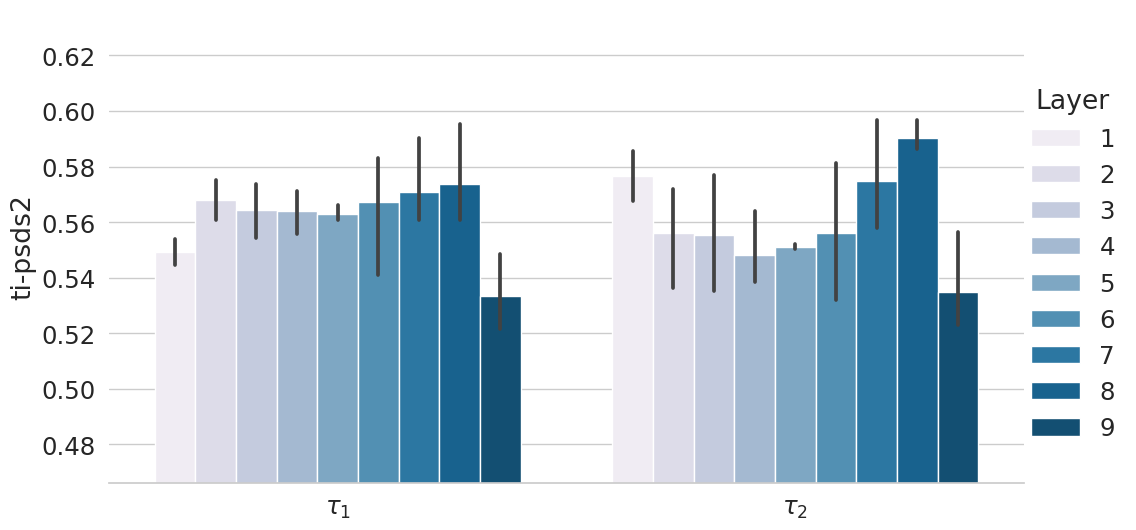

In [3]:
## Impact of augmentation diversity and regularization position on the test performance of the model (Figure 2)

# select score to plot
score_name = "ti-psds2"

# prepare plot data
plot_df = []
for augmentation_diversity in [1, 2]:
    for layer in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
        for version in [1,2,3]:
            try:
                plot_df.append({
                    "model_name" : f"irct_{augmentation_diversity}_l{layer}_{version}",
                    "augmentation_diversity" : "$\\tau_{" + str(augmentation_diversity) + "}$",
                    score_name : score_dict[f"irct_t{augmentation_diversity}_l{layer}_{version}"][name_dict[score_name]],
                    "layer" : layer,
                    "version" : version,
                })
            except:
                pass
plot_df = pd.DataFrame(plot_df)

# plot
sns.set_theme(style="whitegrid", font_scale=1.6)
g = sns.catplot(
    data=plot_df, kind="bar",
    x="augmentation_diversity", y=score_name, hue="layer",
    palette="PuBu", alpha=1, height=6, aspect=14/8
)
g.despine(left=True)
g.set_axis_labels("", score_name)
g.legend.set_title("Layer")
plt.ylim(plot_df[score_name].mean() - 5 * plot_df[score_name].std(), plot_df[score_name].mean() + 4 * plot_df[score_name].std()) 
plt.show()

/home/david/miniconda3/envs/dcase2023/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


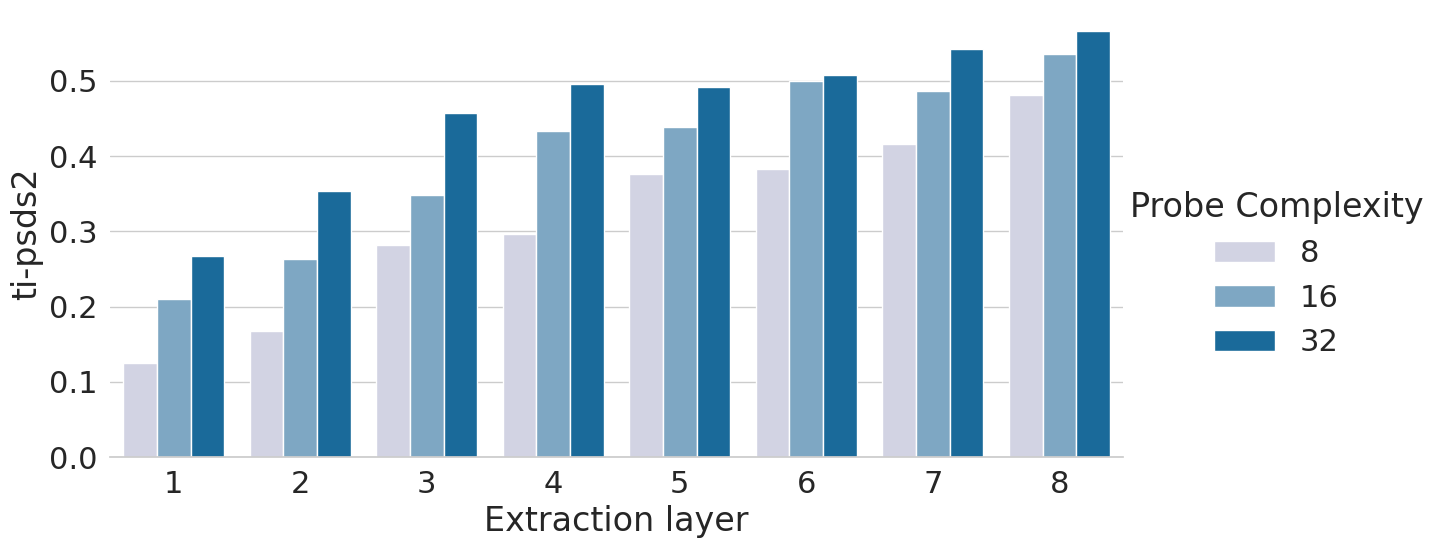

In [4]:
## Impact of probe complexity and extraction layer (Figure 3)

# select score to plot
score_name = "ti-psds2"

# prepare plot data
plot_df = []
for layer in [1, 2, 3, 4, 5, 6, 7, 8]:
    for probe_complexity in [8, 16, 32]:
        plot_df.append({
            #"model_name" : model_name,
            "Extraction layer" : layer,
            "Probe Complexity" : probe_complexity,
            score_name : score_dict[f"probe_h{probe_complexity}_l{layer}_3"][name_dict[score_name]],
        })
plot_df = pd.DataFrame(plot_df)

# plot
sns.set_theme(style="whitegrid", font_scale=2)
g = sns.catplot(
    data=plot_df, kind="bar",
    x="Extraction layer", y=score_name, hue="Probe Complexity",
    palette="PuBu", alpha=1, height=6, aspect=6/3
)
g.despine(left=True)
plt.show()